# Naive Bayes - Resultados

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

### Carregando os dados:

In [13]:
df = pd.read_csv("data/train.csv")

### Como as classes estão bem desbalanceadas (1 = 21694 e 0 = 573502), fiz o balanceamento manualmente: 

In [14]:
class_0 = df[df['target']==0]
class_1 = df[df['target']==1]

data = class_1.append(class_0[:len(class_1)]).drop('id',axis=1)

### Dividindo os dados para Treino e Teste usando a estratégia de Hold-out com 80% para treino e 20% para testes:

In [15]:
x_train, x_test = train_test_split(data,test_size=0.2, random_state=int(time.time()))

### Treinando o modelo:

In [16]:
gnb = GaussianNB()
gnb.fit(x_train.drop('target',axis=1).values,x_train["target"])
print('Acurácia do Treinamento: ', gnb.score(x_test.drop('target',axis=1), x_test['target']))

Acurácia do Treinamento:  0.5792809403088269


### Testando nos 20%

In [17]:
y_pred = gnb.predict(x_test.drop('target',axis=1))
print("Holdout 80-20: " + classification_report(y_pred, x_test['target']))

Holdout 80-20:              precision    recall  f1-score   support

          0       0.76      0.56      0.64      5888
          1       0.40      0.63      0.49      2790

avg / total       0.64      0.58      0.59      8678



### Matriz de Confusão - Holdout:

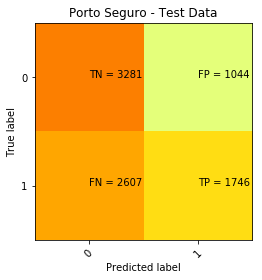

In [18]:
plt.clf()
cm = confusion_matrix(x_test['target'], y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Porto Seguro - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Testando no conjunto inteiro

In [19]:
y_pred_all = gnb.predict(data.drop('target',axis=1))
print("All dataset: "+ classification_report(y_pred_all, data['target']))

All dataset:              precision    recall  f1-score   support

          0       0.76      0.56      0.64     29476
          1       0.40      0.62      0.49     13912

avg / total       0.64      0.58      0.59     43388



### Matriz de Confusão - Conjunto Total

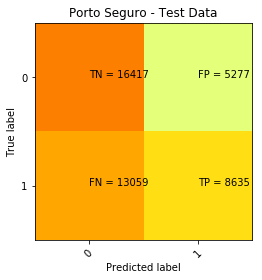

In [20]:
plt.clf()
cm = confusion_matrix(data['target'], y_pred_all)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Porto Seguro - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Executando Cross-Validation com k = 10

In [21]:
scores = cross_val_score(gnb, data.drop('target',axis=1), data['target'] , cv=10)
print('Acurácia Cross-Validation: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Acurácia Cross-Validation: 0.57 (+/- 0.01)


### Matriz de Confusão - Cross-Validation

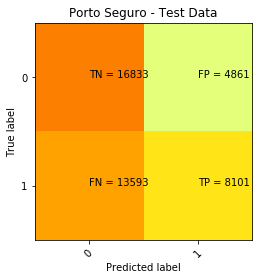

In [22]:
y_pred_cross = cross_val_predict(gnb, data.drop('target',axis=1), data['target'] , cv=10)
plt.clf()
cm = confusion_matrix(data['target'], y_pred_cross)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Porto Seguro - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()